# Task1 : SMS Classifier

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [2]:
df= pd.read_csv(f"/Users/jaini/Desktop/Data_science/spam.csv",encoding='ISO-8859-1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


Dataset Source: Kaggle

The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


Dropping the columns 2,3,4 as they are almost empty

In [5]:
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"], inplace=True)

In [6]:
#checking duplicates
df.duplicated().sum()

403

In [7]:
df= df.drop_duplicates()

In [8]:
df.shape

(5169, 2)

In [9]:
df.isna().sum()

v1    0
v2    0
dtype: int64

In [10]:
df.rename(columns={'v1': 'Labels', 'v2': 'Message'}, inplace=True)

In [11]:
df.head()

,Labels,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Text(0.5, 1.0, 'Count Plot for Labels')

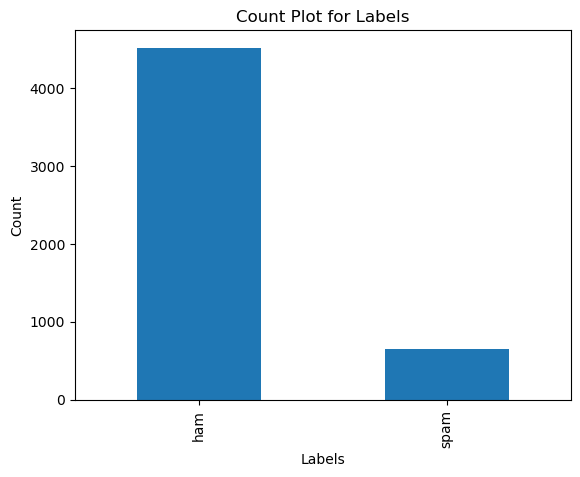

In [12]:
df['Labels'].value_counts().plot(kind='bar')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Count Plot for Labels')

This bar chart shows the counts of ham and spam. It is clear that spam messages are less compared to ham.

### Data Preprocessing 

In [13]:
df['Labels'] = df['Labels'].map({'spam': 1, 'ham': 0})

In [14]:
def clean_text(message):
    # Convert text to lowercase
    message = message.lower()
    
    # Remove punctuation and special characters using regex
    message = re.sub(r'[^a-zA-Z0-9\s]', '', message)
    
    return message

In [15]:
df['Processed_Message'] = df['Message'].apply(clean_text)

In [16]:
df.head()

,Labels,Message,Processed_Message
0,0,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
1,0,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,0,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...


In [17]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer

In [18]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /Users/jaini/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/jaini/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/jaini/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [19]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

def preprocess_text(text):
    tokens = word_tokenize(text)  
    # Tokenization
    filtered_tokens = [token for token in tokens if token.isalpha() and token not in stop_words] 
    # Remove non-alphabets and stopwords
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]  
    # Lemmatization
    stemmed_tokens = [stemmer.stem(token) for token in lemmatized_tokens]  
    # Stemming
    return ' '.join(stemmed_tokens) 

In [20]:
df['Processed_Message'] = df['Processed_Message'].apply(preprocess_text)

In [21]:
df.head()

,Labels,Message,Processed_Message
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri wkli comp win fa cup final tkt may ...
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah dont think go usf life around though


### Feature Extraction & Model Building

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [23]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Processed_Message'])
#TF-IDF Vectorization (changing to numerical values)

In [24]:
y = df['Labels']

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [27]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [28]:
y_pred = svm_model.predict(X_test)

In [29]:
df['Predicted']=svm_model.predict(X)

In [30]:
df.head()

,Labels,Message,Processed_Message,Predicted
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...,0
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri wkli comp win fa cup final tkt may ...,1
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say,0
4,0,"Nah I don't think he goes to usf, he lives aro...",nah dont think go usf life around though,0


### Model Evaluation

In [31]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9738878143133463


In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       885
           1       0.98      0.83      0.90       149

    accuracy                           0.97      1034
   macro avg       0.98      0.91      0.94      1034
weighted avg       0.97      0.97      0.97      1034



* The precision and recall for class 0 are both very high, at 0.97 and 1.00, respectively. This means that the model is very good at identifying both positive and negative samples for this class.

* The precision for class 1 is also very high, at 0.98. However, the recall is slightly lower, at 0.83. This means that the model is very good at identifying positive samples for this class, but it may be missing some actual positives.

* The overall accuracy is very high, at 0.98. This means that the model is correctly classifying nearly all of the samples in the dataset.